In [14]:
import numpy as np
import matplotlib.pyplot
from tqdm import tqdm

In [36]:
# get data

def T(one):
    one = np.array(one, dtype=np.float32)
    one = one.reshape((-1, 3))
    
    A = np.array([[+0.299, +0.587, +0.114],
                  [-0.147, -0.289, +0.436],
                  [+0.615, -0.515, -0.100]], dtype=np.float32)
    
    B = np.array([[0, 128, 128]], dtype=np.float32)
    
    temp1 = A@one.T  + B.T
    one = np.hstack((one, temp1.T[:, 1:]))
    return one

def getData(filename=None):
    if filename is None:
        filename = r"C:\Users\Danish.Amin\Downloads\Skin_NonSkin.txt"
    
    one, two = [], []
    with open(filename, 'r') as fp:
        lines = fp.readlines()
        for line in lines:
            a,b,c,d = map(int, line.split())
            
            if d == 1:
                one.append([a, b, c])
            else:
                two.append([a, b, c])
                
    one = T(one)
    two = T(two)
    
    return [one, two]

data = getData()
print(data)
print(data[0].shape, data[1].shape)
T((73,  84, 122))

[array([[ 74.      ,  85.      , 123.      , 146.185   , 117.435005],
       [ 73.      ,  84.      , 122.      , 146.185   , 117.435   ],
       [ 72.      ,  83.      , 121.      , 146.185   , 117.435   ],
       ...,
       [ 95.      , 132.      , 182.      , 155.239   , 100.245   ],
       [ 92.      , 132.      , 181.      , 155.244   ,  98.5     ],
       [ 94.      , 131.      , 181.      , 155.239   , 100.245   ]],
      dtype=float32), array([[198.   , 198.   , 158.   , 110.56 , 132.   ],
       [198.   , 198.   , 158.   , 110.56 , 132.   ],
       [198.   , 198.   , 158.   , 110.56 , 132.   ],
       ...,
       [163.   , 162.   , 112.   , 106.053, 133.615],
       [163.   , 162.   , 112.   , 106.053, 133.615],
       [255.   , 255.   , 255.   , 128.   , 128.   ]], dtype=float32)]
(50859, 5) (194198, 5)


array([[ 73.      ,  84.      , 122.      , 146.185   , 117.435005]],
      dtype=float32)

In [35]:
def classifier(x, data, naive=True):
    # prb of y=1
    # P(Y|X) = P(X|Y)*P(Y)/P(X)
    # assuming naive baysian classifier.
    
    one, two = data
    a, b = one.shape[0], 1. / (one.shape[0] + two.shape[0])
    p_y = a * b
    
    if naive:
        # naive classifier
        cnt_x = np.zeros((5,))

        for i in range(5):
            cnt_x[i] += np.count_nonzero(np.array(one[:,i], dtype=np.int32) == np.array(x[0][i],  dtype=np.int32))

        p_xy = np.prod(cnt_x / one.shape[0])

        for i in range(5):
            cnt_x[i] += np.count_nonzero(np.array(two[:,i], dtype=np.int32) == np.array(x[0][i],  dtype=np.int32))
    
    else:
        # non naive classifier
        cnt_x = np.zeros((1,))
        
        cnt_x[0] += np.count_nonzero(np.prod(np.array(one, dtype=np.int32) == np.array(x[0], dtype=np.int32), axis=-1))
        
        p_xy = np.prod(cnt_x / one.shape[0])
        
        cnt_x[0] += np.count_nonzero(np.prod(np.array(two, dtype=np.int32) == np.array(x[0], dtype=np.int32), axis=-1))
       
    p_x = np.prod(cnt_x * b)
    if p_x == 0.0:
        return 0.
    
    return p_xy*p_y/p_x
    
classifier(T((92.      , 133.      , 181.)), data, naive=True)

18.02152578849988

179 281


100%|████████████████████████████████████████████████████████████████████████████████| 179/179 [02:52<00:00,  1.04it/s]


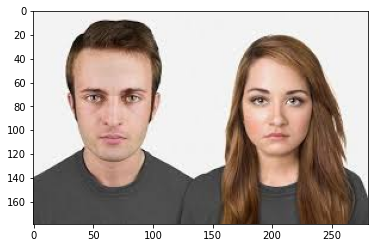

In [24]:
from PIL import Image
from IPython.display import display

# Open the image form working directory
file = 'C:\\Users\\Danish.Amin\\Downloads\\test2.jpg'
image_raw = Image.open(file)
image = np.asarray(image_raw)
h, w, _ = image.shape
final = np.zeros((h, w), dtype=np.uint8)

print(h, w)

for i in tqdm(range(h)):
    for j in range(w):
        x = T(image[i][j])
        final[i][j] = np.clip(255*classifier(x, data), 0, 255)

a = np.array(final, dtype=np.uint8)
plt.imshow(image)
plt.show()

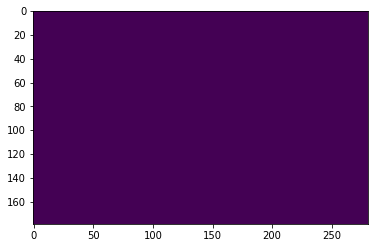

In [25]:
image2 = Image.fromarray(a)
plt.imshow(image2)
plt.show()